In [1]:
import numpy as np

images = np.load("data/radio-galaxies.npy").astype(np.float32)
np.random.shuffle(images)

images = np.squeeze(images)

print('shape:     ', images.shape)
print('min value: ', np.amin(images))
print('max value: ', np.amax(images))

shape:      (4284, 130, 130)
min value:  0.0
max value:  1.0


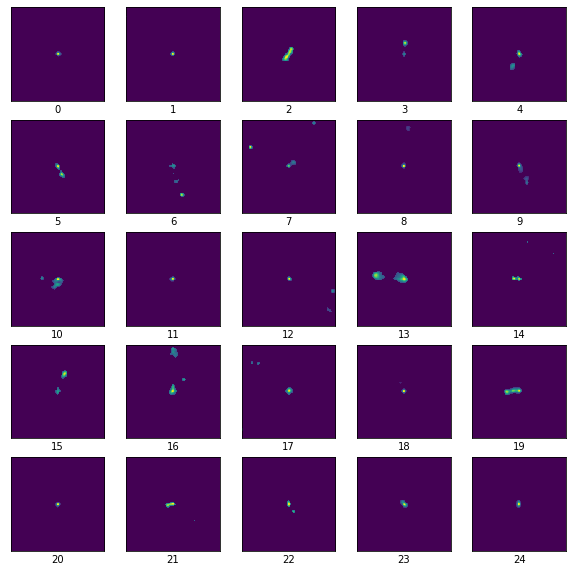

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(i)

In [3]:
import math
import pink

som_dim = 10
neuron_dim = int(images.shape[1] / math.sqrt(2.0) * 2.0)
euclid_dim = int(images.shape[1] * math.sqrt(2.0) / 2.0)
print("neuron_dim = ", neuron_dim)
print("euclid_dim = ", euclid_dim)

np_som = np.zeros((som_dim, som_dim, neuron_dim, neuron_dim)).astype(np.float32)
som = pink.SOM(np_som)

data = [pink.Data(images[i]) for i in range(len(images))]

trainer = pink.Trainer(som, euclidean_distance_dim=euclid_dim,
                       use_gpu=False)

neuron_dim =  183
euclid_dim =  91


In [4]:
from tqdm import tqdm_notebook
import time

nb_train = 100
nb_warm_up = 20

start_time = time.time()

for i in tqdm_notebook(range(nb_train), desc="train"):
    trainer(data[i])
    
time_cpu = time.time() - start_time

print("time_cpu", time_cpu)


time_cpu 19.63876962661743


In [5]:
trainer = pink.Trainer(som, euclidean_distance_dim=euclid_dim,
                       euclidean_distance_type=pink.FLOAT)

start_time = time.time()

for i in tqdm_notebook(range(nb_train), desc="train"):
    trainer(data[i])
    
time_gpu_float = time.time() - start_time

print("time_gpu_float", time_gpu_float)


time_gpu_float 0.9312102794647217


In [6]:
trainer = pink.Trainer(som, euclidean_distance_dim=euclid_dim,
                       euclidean_distance_type=pink.UINT8)

# Warm up
for i in tqdm_notebook(range(nb_warm_up), desc="train"):
    trainer(data[i])

start_time = time.time()

for i in tqdm_notebook(range(nb_train), desc="train"):
    trainer(data[i])
    
time_gpu_uint8 = time.time() - start_time

print("time_gpu_uint8", time_gpu_uint8)


time_gpu_uint8 0.5055632591247559


<BarContainer object of 3 artists>

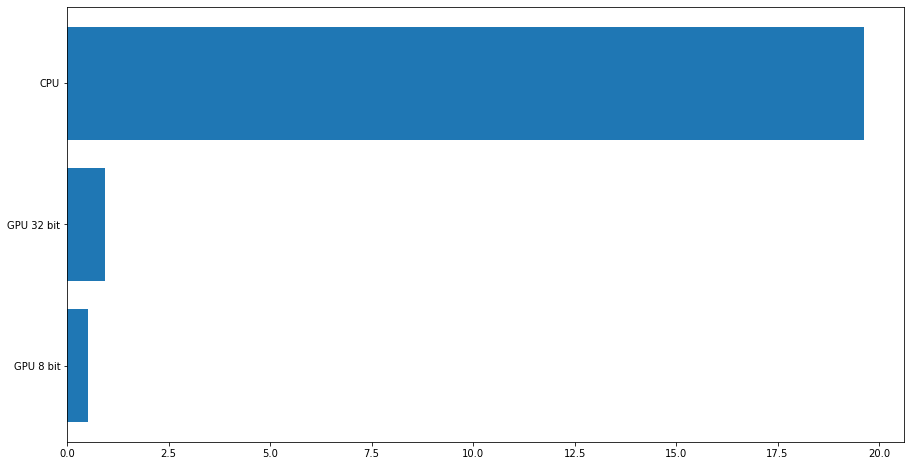

In [7]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(['GPU 8 bit', 'GPU 32 bit', 'CPU'], [time_gpu_uint8, time_gpu_float, time_cpu])